# Quick

https://nixtlaverse.nixtla.io/mlforecast/docs/getting-started/quick_start_local.html

In [ ]:
import pandas as pd
from utilsforecast.plotting import plot_series

In [ ]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [ ]:
df['unique_id'].value_counts()

unique_id
AirPassengers    144
Name: count, dtype: int64

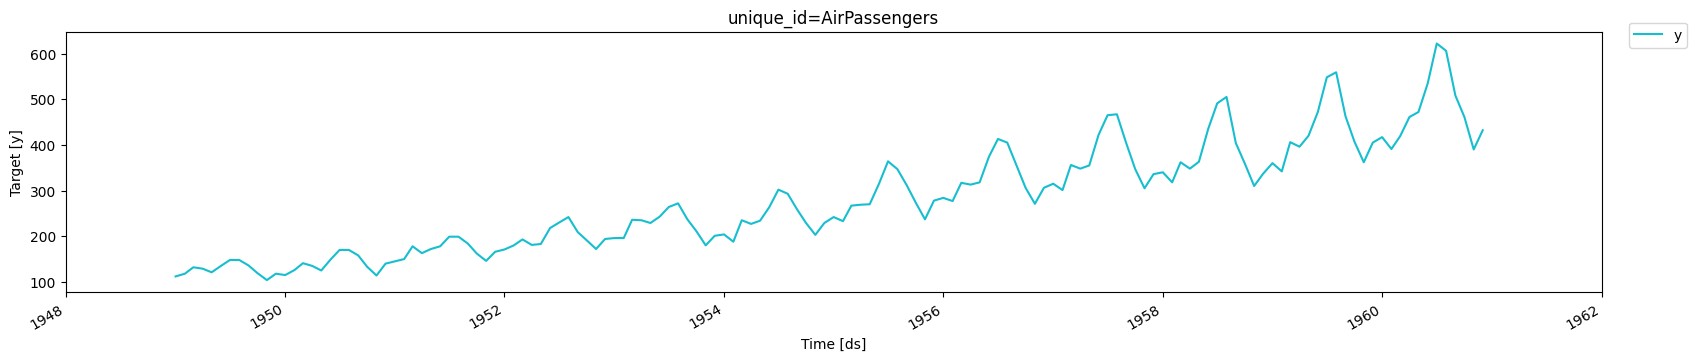

In [ ]:
plot_series(df)

In [ ]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from sklearn.linear_model import LinearRegression

In [ ]:
fcst = MLForecast(
    models=LinearRegression(),
    freq='MS',  # our serie has a monthly frequency
    lags=[12],
    target_transforms=[Differences([1])],
)
fcst.fit(df)

MLForecast(models=[LinearRegression], freq=MS, lag_features=['lag12'], date_features=[], num_threads=1)

In [ ]:
preds = fcst.predict(12)
preds

,unique_id,ds,LinearRegression
0,AirPassengers,1961-01-01,444.656555
1,AirPassengers,1961-02-01,417.470734
2,AirPassengers,1961-03-01,446.903046
3,AirPassengers,1961-04-01,491.014130
4,AirPassengers,1961-05-01,502.622223
5,AirPassengers,1961-06-01,568.751465
6,AirPassengers,1961-07-01,660.044312
7,AirPassengers,1961-08-01,643.343323
8,AirPassengers,1961-09-01,540.666687
9,AirPassengers,1961-10-01,491.462708


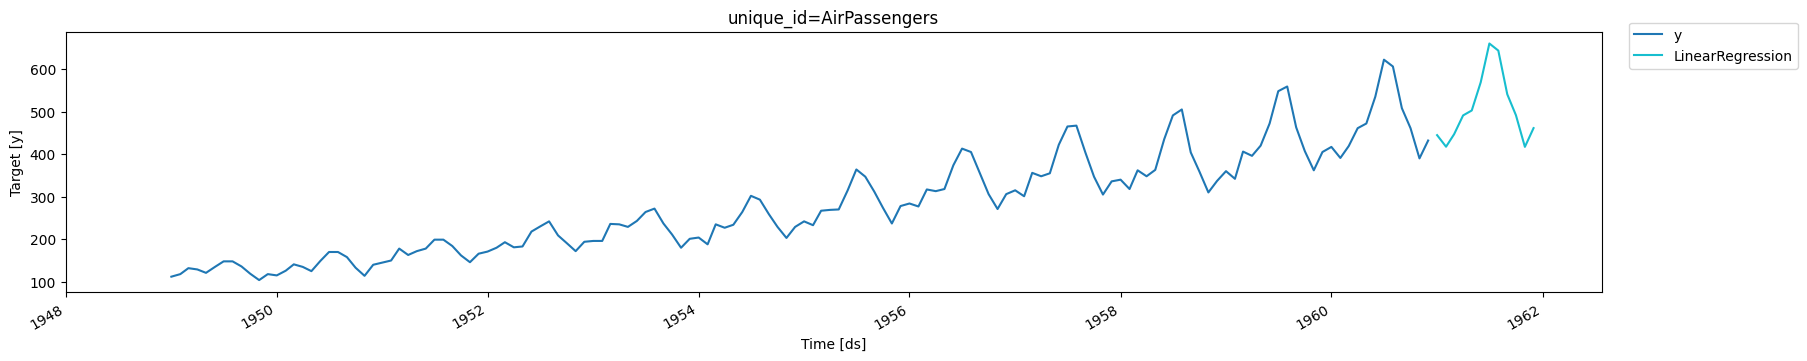

In [ ]:
plot_series(df, preds)